# Figures S8, S9, and S14

This notebook loads the data and produces figures S8, S9, and S14.

In [1]:
plotsavedate = '20251031'

In [2]:
data_folder = '' # path to data
path_to_analysis_folder = '' # path to analysis folder
path_to_figure_folder = '' # path to figure folder

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
import numpy as np
import copy
from matplotlib.colors import LinearSegmentedColormap

## Load and process data

In [4]:
# Load labels
all_labels = pd.read_csv(data_folder+'clustering_labels_saved_'+'20250625'+'.csv', index_col=0)

# Load cluster centers
df_kmeans_centers = pd.read_csv(data_folder + 'cluster_centers_kmeans_nc8_20250502.csv', index_col=0)

# Load station-level data
string_cols = ['unique_ID', 'Station Name', 'Street Address', 'City', 'State', 'ZIP']#['unique_ID', 'Station Name', 'Street Address', 'Intersection Directions', 'City', 'State_abbr', 'ZIP',  'Status Code', 'EV Network', 'Owner Type Code', 'Open Date',  'EV Pricing', 'Facility Type', 'Groups With Access Code',  'Access Days Time', 'COUNTYNAME', 'State',  'clostestname_PoI', 'clostestname_ind', 'clostestname_topcat', 'utility', 'utilitytype', 'STATEFP']
dtype_dict = {i:'string' for i in string_cols}
combined_df_stations = pd.read_csv(data_folder + '20_level_stations_US_compiled_250415.zip', index_col=0,
                                   dtype=dtype_dict, usecols=['unique_ID', 'Station Name', 'Street Address', 'City', 'State', 'ZIP', 'distance_from_home'])
state_list = np.sort(list(combined_df_stations['State'].unique()))

# Combine
combined_df_stations = combined_df_stations.merge(all_labels, on='unique_ID', how='outer')

# Extract cluster average distance from home

label_mapping = {}
label_mapping['Nice Names'] = {0:'University/college campuses',
                               1:'Weekday daytime short stops',
                               2:'City neighborhoods',
                               3:'Weekday daytime long stops',
                               4:'Gas station very short stops',
                               5:'Weekend evening recreation',
                               6:'City destinations',
                               7:'Hotels'}

df_dist = pd.DataFrame(combined_df_stations.groupby('Kmeans_nc8')['distance_from_home'].mean()).reset_index().sort_values(by='distance_from_home')
for i in df_dist.index:
    df_dist.loc[i, 'label'] = label_mapping['Nice Names'][df_dist.loc[i, 'Kmeans_nc8']]
df_dist = df_dist.reset_index(drop=True)

In [5]:
import os
os.chdir(path_to_analysis_folder)

from clustering_allUS_preprocessing import ClusteringData
dataobj = ClusteringData(savedate=plotsavedate)

# Plot

In [6]:
colours_dict8_v3 = {1:'#006837',
                    3:'#1a9850',
                    5:'#a6d96a',
                    2:'#fdae61',
                    6:'#f46d43',
                    7:'#cb181d',
                    4:'#df65b0',
                    0:'#8073ac'}

cluster_order_numbers8_v3 = [1, 3, 5, 2, 6, 7, 4, 0]

## Figure S8a

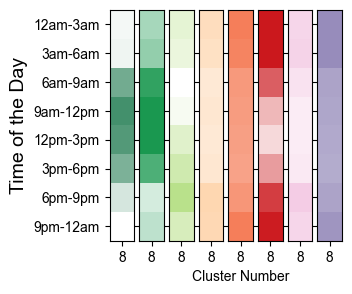

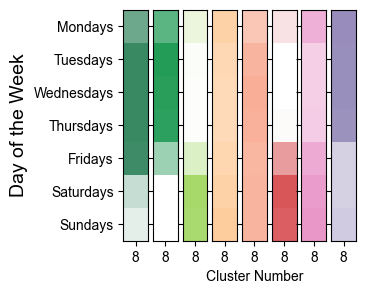

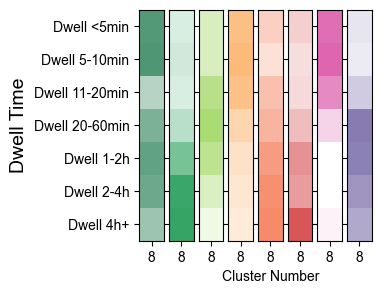

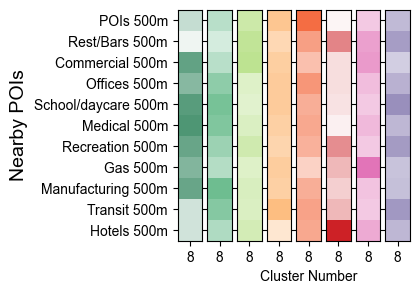

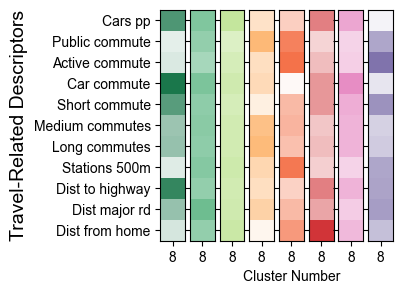

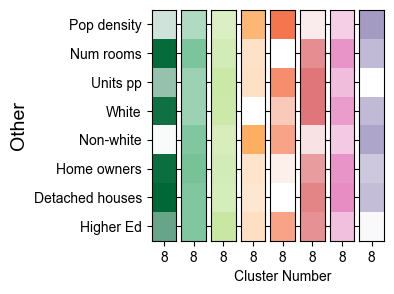

In [7]:
for col_cluster in np.arange(0, 6):
    # For each set of columns (grouped for easier interpretation)
    columns = dataobj.column_ordering[dataobj.column_ordering['Col_Cluster_forDisplay_v2']==col_cluster]['Column'].values
    columns_nice = dataobj.column_ordering[dataobj.column_ordering['Col_Cluster_forDisplay_v2']==col_cluster]['Columns_NiceName'].values
    tmp = df_kmeans_centers.loc[:, columns].copy()

    # Plot
    fig, axes = plt.subplots(1, 8, figsize=(3, 3), sharex=True, sharey=True)
    for i, clust in enumerate(cluster_order_numbers8_v3):
        cm = LinearSegmentedColormap.from_list('Cmap'+str(clust), ['white', colours_dict8_v3[clust]], N=50)
        axes[i].imshow(np.array(tmp.loc[clust, :].T).reshape((len(columns), 1)), cmap=cm, aspect='auto',
                       vmin=df_kmeans_centers.min(axis=1)[clust], vmax=df_kmeans_centers.max(axis=1)[clust])

        # Labeling
        axes[i].set_yticks(np.arange(0, len(columns)))
        axes[i].set_yticklabels(columns_nice)
        if i == 0:
            axes[i].set_ylabel(dataobj.section_labels[col_cluster], fontsize=14)
        if i == 4:
            axes[i].set_xlabel('Cluster Number')
    
    for j in range(8):
        axes[j].set_xticks([0])
        axes[j].set_xticklabels([str(j+1)])

    plt.savefig(path_to_figure_folder + 'Figures/figureS8a_clustercenters8_columns'+str(col_cluster)+'_'+plotsavedate+'.pdf', bbox_inches='tight', dpi=400)
    plt.savefig(path_to_figure_folder + 'Figures/figureS8a_clustercenters8_columns'+str(col_cluster)+'_'+plotsavedate+'.png', bbox_inches='tight', dpi=400)
    plt.show()

#### Legend

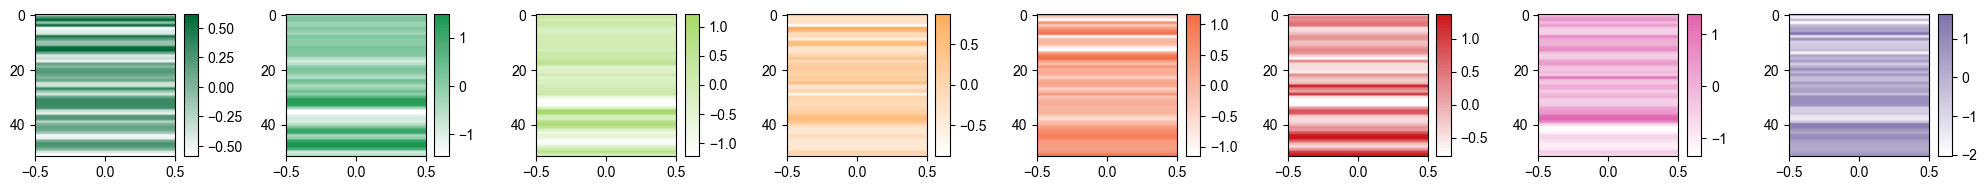

In [8]:
fig, axes = plt.subplots(1, 8, figsize=(20,2))
for i, clust in enumerate(cluster_order_numbers8_v3):
    cm = LinearSegmentedColormap.from_list('Cmap'+str(clust), ['white', colours_dict8_v3[clust]], N=50)
    im = axes[i].imshow(np.array(df_kmeans_centers.loc[clust, :].T).reshape((-1, 1)), cmap=cm, aspect='auto',
                   vmin=df_kmeans_centers.min(axis=1)[clust], vmax=df_kmeans_centers.max(axis=1)[clust])#, colorbar=True)
    plt.colorbar(im, ax=axes[i], aspect=10)
    
plt.tight_layout()
plt.savefig(path_to_figure_folder + 'Figures/figureS8a_colorbar_'+plotsavedate+'.pdf', bbox_inches='tight')        


## Figure S9
Distance from home

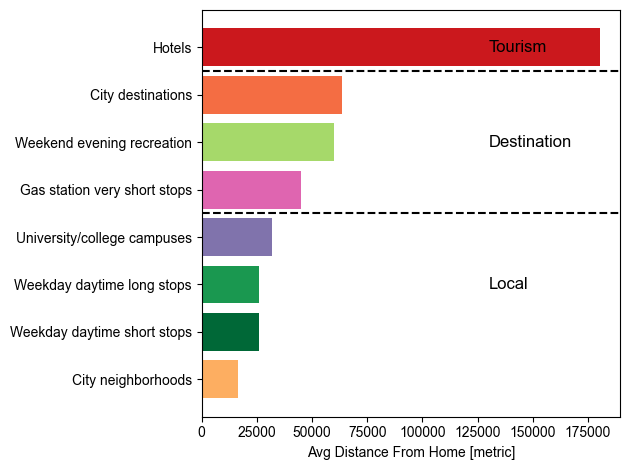

In [9]:
plt.figure()
for i in df_dist.index.values:
    plt.barh([i], df_dist.loc[i, 'distance_from_home'], color=colours_dict8_v3[df_dist.loc[i, 'Kmeans_nc8']])
plt.yticks(df_dist.index.values, labels=df_dist['label'].values)
plt.xlabel('Avg Distance From Home [metric]')
plt.axhline(6.5, linestyle='--', color='k')
plt.axhline(3.5, linestyle='--', color='k')
plt.text(130000, 1.9, 'Local', size='large')
plt.text(130000, 4.9, 'Destination', size='large')
plt.text(130000, 6.9, 'Tourism', size='large')
plt.tight_layout()
plt.savefig(path_to_figure_folder + 'Figures/figureS9_dist_from_home_labels_'+plotsavedate+'.pdf', bbox_inches='tight')
plt.savefig(path_to_figure_folder + 'Figures/figureS9_dist_from_home_labels_'+plotsavedate+'.png', bbox_inches='tight')
plt.show()

## Figure S14

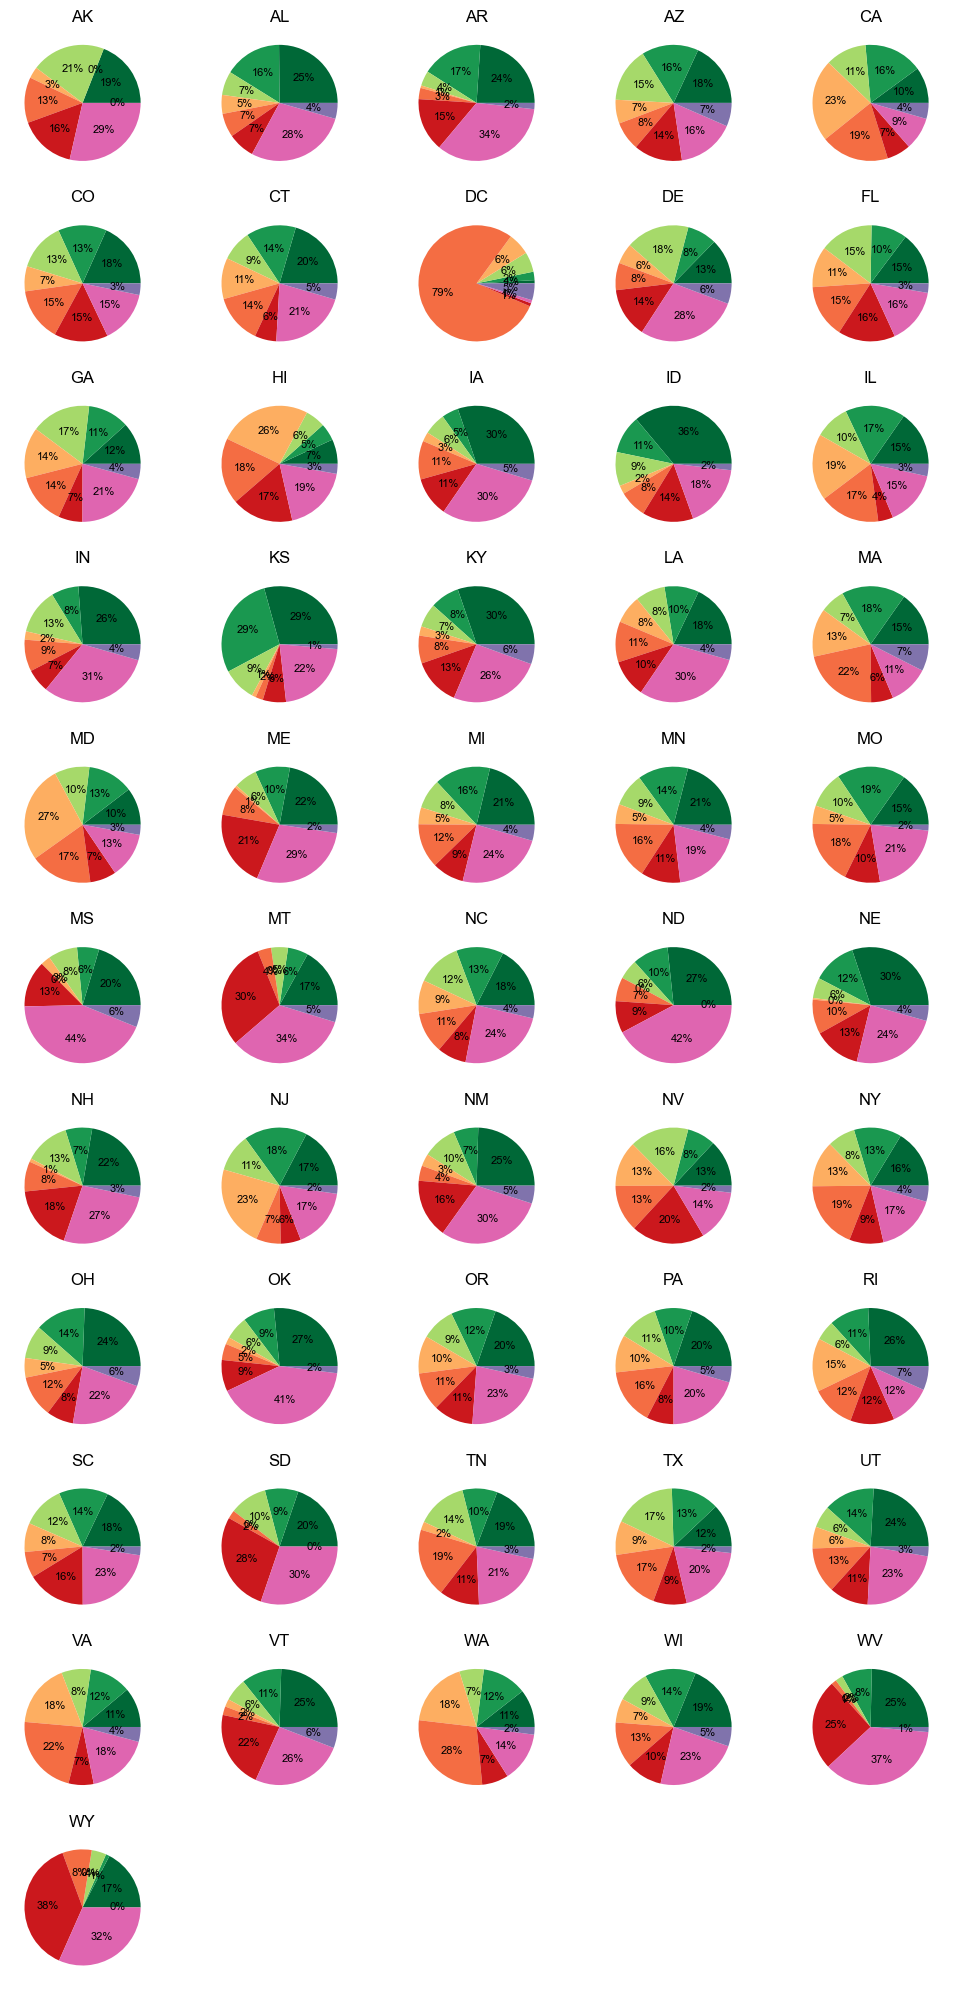

In [10]:
fig, axes = plt.subplots(11, 5, figsize=(10, 20))
for row in range(11):
    for col in range(5):
        i = 5*row + col
        if i < len(state_list):
            state = state_list[i]
            ct_dict = combined_df_stations[combined_df_stations['State']==state]['Kmeans_nc8'].value_counts()
            ct_dict2 = {i:ct_dict[i] if i in ct_dict.keys() else 0 for i in range(10)}
            axes[row, col].pie([ct_dict2[j] for j in cluster_order_numbers8_v3], 
                               colors=[colours_dict8_v3[j] for j in cluster_order_numbers8_v3], 
                               autopct='%1.0f%%', textprops={'fontsize':8})
            axes[row, col].set_title(state)
        else:
            axes[row, col].axis('off')
plt.tight_layout()
plt.savefig(path_to_figure_folder + 'Figures/figureS14_states_clustersplit_nc8_'+plotsavedate+'.pdf', dpi=400, bbox_inches='tight')
plt.savefig(path_to_figure_folder + 'Figures/figureS14_states_clustersplit_nc8_'+plotsavedate+'.png', dpi=400, bbox_inches='tight')
plt.show()